In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# add log transformation of bmi as new column bmi_log
df['bmi_log'] = np.log(df['bmi'])

<Axes: xlabel='bmi_log', ylabel='Count'>

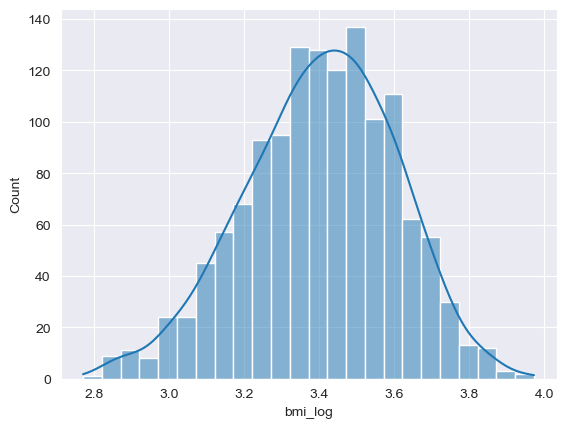

In [6]:
sns.histplot(data=df, x="bmi_log", kde=True)

<Axes: >

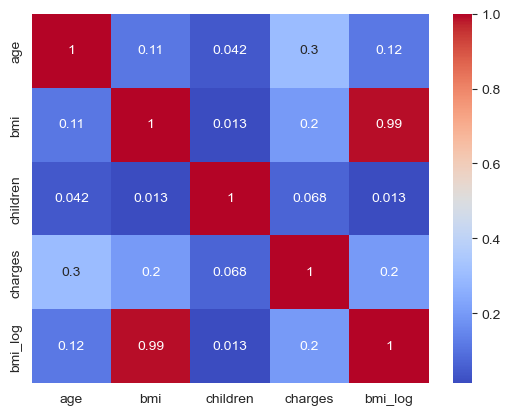

In [7]:
df_corr = df.corr(numeric_only=True)

sns.heatmap(data=df_corr, annot=True, cmap='coolwarm')

In [8]:
# create dummy variables for categorical variables
pd.get_dummies(data=df, columns=['region'], drop_first=True)

,age,sex,bmi,children,smoker,charges,bmi_log,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,3.328627,False,False,True
1,18,male,33.770,1,no,1725.55230,3.519573,False,True,False
2,28,male,33.000,3,no,4449.46200,3.496508,False,True,False
3,33,male,22.705,0,no,21984.47061,3.122585,True,False,False
4,32,male,28.880,0,no,3866.85520,3.363149,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,3.433019,True,False,False
1334,18,female,31.920,0,no,2205.98080,3.463233,False,False,False
1335,18,female,36.850,0,no,1629.83350,3.606856,False,True,False
1336,21,female,25.800,0,no,2007.94500,3.250374,False,False,True


In [9]:
df.drop(columns=['bmi_log'], inplace=True)

In [10]:
df_lr = df.copy()
df_lr['sex_male'] = df['sex'].map(lambda x: True if x == 'male' else False)
df_lr['smoker_yes'] = df['smoker'].map(lambda x: True if x == 'yes' else False)
df_lr.drop(columns=['sex', 'smoker'], inplace=True)
df_lr

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,False,True
1,18,33.770,1,southeast,1725.55230,True,False
2,28,33.000,3,southeast,4449.46200,True,False
3,33,22.705,0,northwest,21984.47061,True,False
4,32,28.880,0,northwest,3866.85520,True,False
...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,True,False
1334,18,31.920,0,northeast,2205.98080,False,False
1335,18,36.850,0,southeast,1629.83350,False,False
1336,21,25.800,0,southwest,2007.94500,False,False


In [11]:
df_lr = pd.get_dummies(data=df_lr, columns=['region'], drop_first=True)

In [12]:
df_lr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [13]:
y = df_lr['charges']
X = df_lr.drop(columns=['charges'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
y_test.shape

(402,)

In [21]:
y_train

744      8827.20990
363      2597.77900
10       2721.32080
970     10702.64240
634      9391.34600
           ...     
715     12146.97100
905      4564.19145
1096    44641.19740
235     19444.26580
1061    11554.22360
Name: charges, Length: 936, dtype: float64

In [28]:
y_train.tolist()

[8827.2099,
 2597.779,
 2721.3208,
 10702.6424,
 9391.346,
 17878.90068,
 34838.873,
 28950.4692,
 11482.63485,
 1704.70015,
 12430.95335,
 16115.3045,
 5662.225,
 11394.06555,
 5003.853,
 1964.78,
 13415.0381,
 1967.0227,
 18963.17192,
 8125.7845,
 3385.39915,
 3577.999,
 4889.0368,
 26125.67477,
 1241.565,
 1708.0014,
 12495.29085,
 36898.73308,
 18767.7377,
 1674.6323,
 2166.732,
 9249.4952,
 7160.094,
 10407.08585,
 14474.675,
 2689.4954,
 14418.2804,
 17929.30337,
 11735.87905,
 4883.866,
 5478.0368,
 20177.67113,
 3659.346,
 9850.432,
 23887.6627,
 5855.9025,
 7639.41745,
 6393.60345,
 44501.3982,
 55135.40209,
 4239.89265,
 1622.1885,
 12233.828,
 39722.7462,
 35160.13457,
 2395.17155,
 1748.774,
 1639.5631,
 32548.3405,
 2304.0022,
 37465.34375,
 43254.41795,
 46113.511,
 20984.0936,
 4463.2051,
 33900.653,
 10928.849,
 9715.841,
 12231.6136,
 6184.2994,
 9704.66805,
 19023.26,
 3597.596,
 9500.57305,
 9048.0273,
 18955.22017,
 24513.09126,
 11840.77505,
 48824.45,
 2302.3,
 48

In [32]:
x = sm.add_constant(X_train)
x['sex_male'] = x['sex_male'].astype(int)
x['smoker_yes'] = x['smoker_yes'].astype(int)
x['region_northwest'] = x['region_northwest'].astype(int)
x['region_southeast'] = x['region_southeast'].astype(int)
x['region_southwest'] = x['region_southwest'].astype(int)
x

#print(model.summary())

,const,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
744,1.0,50,26.410,0,1,0,1,0,0
363,1.0,21,26.400,1,0,0,0,0,1
10,1.0,25,26.220,0,1,0,0,0,0
970,1.0,50,28.160,3,0,0,0,1,0
634,1.0,51,39.700,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
715,1.0,60,28.900,0,1,0,0,0,1
905,1.0,26,29.355,2,0,0,0,0,0
1096,1.0,51,34.960,2,0,1,0,0,0
235,1.0,40,22.220,2,0,1,0,1,0


In [33]:
model = sm.OLS(y_train, x).fit()

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     356.2
Date:                Sat, 23 Sep 2023   Prob (F-statistic):          1.27e-276
Time:                        14:21:40   Log-Likelihood:                -9477.0
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     927   BIC:                         1.902e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.104e+04   1172.364  

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_train_2 = X_train.copy()
x_train_2['sex_male'] = x_train_2['sex_male'].astype(int)
x_train_2['smoker_yes'] = x_train_2['smoker_yes'].astype(int)
x_train_2['region_northwest'] = x_train_2['region_northwest'].astype(int)
x_train_2['region_southeast'] = x_train_2['region_southeast'].astype(int)
x_train_2['region_southwest'] = x_train_2['region_southwest'].astype(int)


vif = pd.DataFrame()
vif['Features'] = x_train_2.columns
vif['VIF'] = [variance_inflation_factor(x_train_2.values, i) for i in range(x_train_2.shape[1])]
vif


,Features,VIF
0,age,7.682203
1,bmi,11.428570
2,children,1.795887
3,sex_male,2.027426
4,smoker_yes,1.259378
5,region_northwest,1.906387
6,region_southeast,2.243518
7,region_southwest,2.041598


In [39]:
x3 = x.copy()
x3.drop(columns=['region_northwest', 'region_southwest', 'region_southeast', 'sex_male'], inplace=True)
x3

sm.stats.diagnostic.het_goldfeldquandt(y_train, x3)

(0.9766405049171404, 0.6003139612490169, 'increasing')

In [40]:
vif_series = pd.Series([variance_inflation_factor(x.values,i) for i in range(x.shape[1])],index=x.columns)
print('VIF values: \n\n{}\n'.format(vif_series))

VIF values: 

const               34.929146
age                  1.017392
bmi                  1.103774
children             1.005975
sex_male             1.008544
smoker_yes           1.006921
region_northwest     1.526081
region_southeast     1.652557
region_southwest     1.557593
dtype: float64
